# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

---

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Create base URL for open weather map API call
data_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print (data_url)

the_city = []
cloud = []
country = []
date = []
humidity = []
latitude = []
longitude = []
temp = []
wind = []

# define record counter to count records from 1.

record_count = 1

# Print statement for log.
print("Beginning Data Retrieval")
print('...............................')

#query_url = data_url + "appid=" + weather_api_key + "--&q=" + 'faya'
#print(query_url)

# Loop through all cities in cities list.
for i, city in enumerate(cities):
       

    try:
        response = requests.get(f'{data_url}&q={city}').json()
        #print(response)
        the_city.append(response['name'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        print(f'Processing Record {record_count} | {city}')
      
        # Increase record counter.
        record_count += 1
      
            
    # If no record found for city, then skip.
    except:
        print('City not found. Skipping...')
    continue  

In [21]:
#create dictionary contains the required values, and assign them into bandas data frame
data_in_dict_df = pd.DataFrame ({
    'City': the_city,
    'Cloudiness': cloud,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': latitude,
    'Lng': longitude,
    'Max Temperature': temp,
    'Wind Speed': wind
})

data_in_dict_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Rio Claro,0,BR,1694956061,59,-22.4114,-47.5614,89.51,6.26
1,Port-aux-Français,100,TF,1694955984,96,-49.3500,70.2167,42.80,34.85
2,Puerto Natales,10,CL,1694955866,75,-51.7236,-72.4875,34.41,2.66
3,Bethel,0,US,1694955982,80,41.3712,-73.4140,63.41,0.00
4,Ushuaia,99,AR,1694955988,81,-54.8000,-68.3000,30.74,2.55


In [ ]:
# Show Record Count
data_in_dict_df.count()

In [ ]:
# Export the City_Data into a csv
data_in_dict_df.to_csv("output_data/my_cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
data_in_dict_df = pd.read_csv("output_data/my_cities.csv", index_col="City_ID")

# Display sample data
data_in_dict_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(data_in_dict_df['Lat'], data_in_dict_df['Max Temperature'], marker='o', s=25, c='w', edgecolors='blue')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('output_data/Max_Temp_vs_Lat.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(data_in_dict_df['Lat'], data_in_dict_df['Humidity'], marker='o', s=25, c='w', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('output_data/Humidity_vs_Lat.png')

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

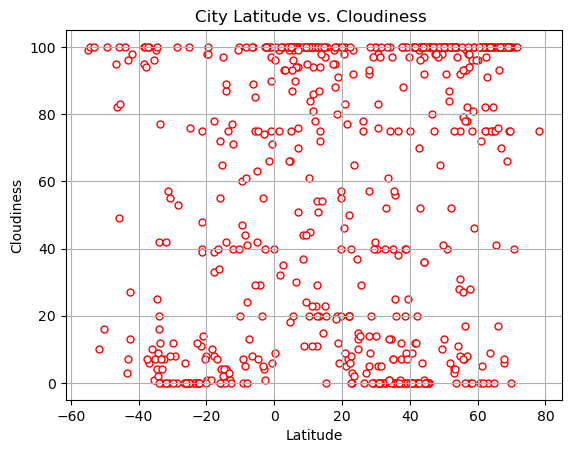

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(data_in_dict_df['Lat'], data_in_dict_df['Cloudiness'], marker='o', s=25, c='w', edgecolors='red')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness ')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('output_data/Cloudiness_vs_Lat.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

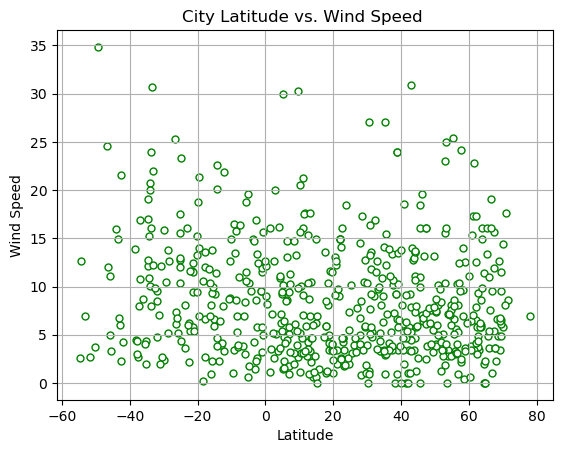

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(data_in_dict_df['Lat'], data_in_dict_df['Wind Speed'], marker='o', s=25, c='w', edgecolors='g')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed ')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('output_data/Cloudiness_vs_Lat.png')

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-squared is: 0.091


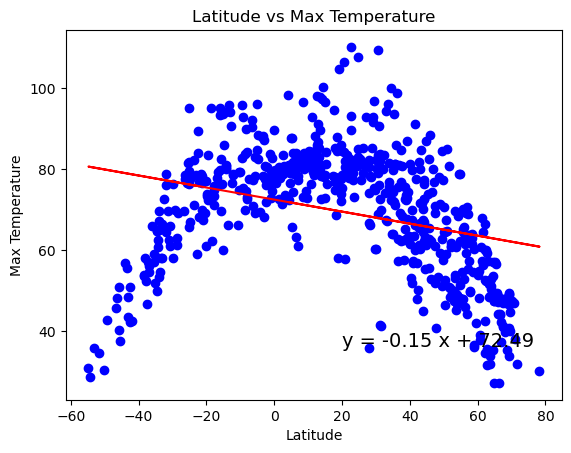

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_Hemisphere= data_in_dict_df["Lat"] >= 0
# Display sample data
northern_Hemisphere.head()

0    False
1    False
2    False
3     True
4    False
Name: Lat, dtype: bool

In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
Southern_Hemisphere = data_in_dict_df["Lat"] < 0
# Display sample data
Southern_Hemisphere.head()

0     True
1     True
2     True
3    False
4     True
Name: Lat, dtype: bool

In [39]:
#create a new dataframes for northern latitudes
northern_hemi_df = data_in_dict_df.loc[(data_in_dict_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
3,Bethel,0,US,1694955982,80,41.3712,-73.4140,63.41,0.00
6,Udachny,93,RU,1694955982,90,66.4167,112.4000,27.19,7.54
7,Osica de Sus,36,RO,1694956251,39,44.2500,24.3167,77.22,11.12
8,Klyuchi,52,RU,1694955818,61,52.2667,79.1667,61.75,5.06
9,Lobujya,92,NP,1694956251,95,27.9500,86.8167,35.69,4.99


In [40]:
#create a new dataframes for southern latitudes
southern_hemi_df = data_in_dict_df.loc[(data_in_dict_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Rio Claro,0,BR,1694956061,59,-22.4114,-47.5614,89.51,6.26
1,Port-aux-Français,100,TF,1694955984,96,-49.3500,70.2167,42.80,34.85
2,Puerto Natales,10,CL,1694955866,75,-51.7236,-72.4875,34.41,2.66
4,Ushuaia,99,AR,1694955988,81,-54.8000,-68.3000,30.74,2.55
5,Invercargill,82,NZ,1694955775,78,-46.4000,168.3500,48.02,11.99


The r-squared is: 0.554


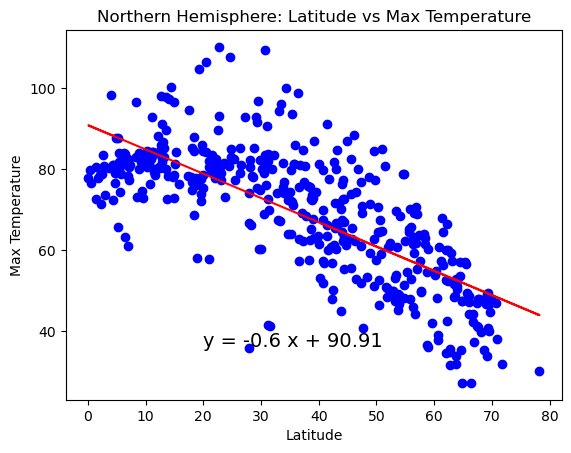

In [43]:
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temperature"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temperature"],color='b')
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere: Latitude vs Max Temperature")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.619


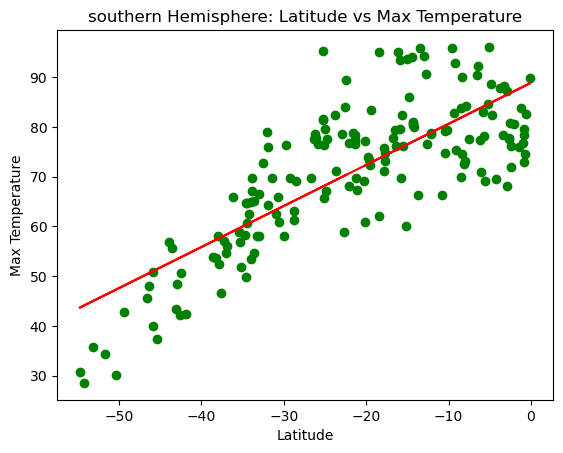

In [47]:
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temperature"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temperature"],color='g')
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("southern Hemisphere: Latitude vs Max Temperature")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.0


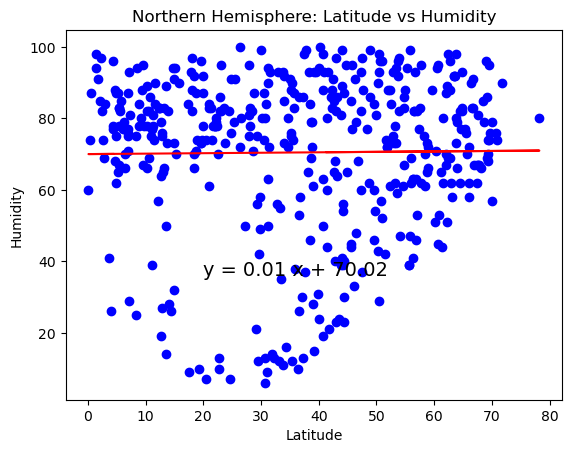

In [49]:
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],color='b')
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere: Latitude vs Humidity")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.001


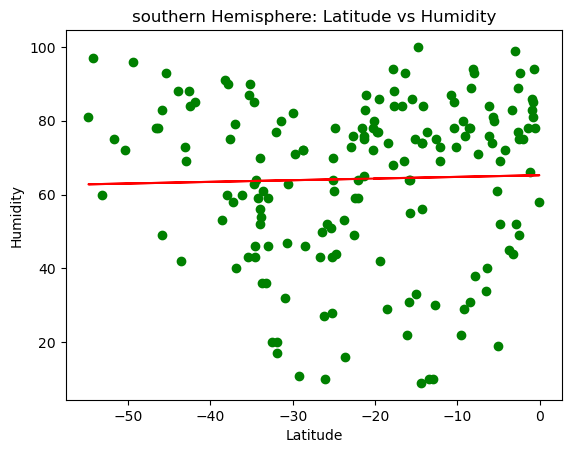

In [51]:
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],color='g')
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("southern Hemisphere: Latitude vs Humidity")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.003


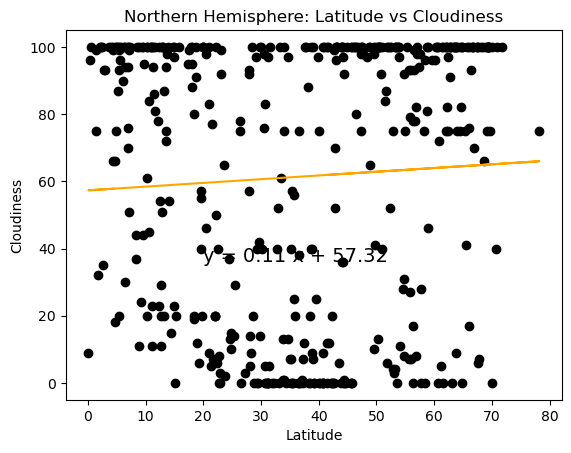

In [58]:
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],color='black')
plt.plot(northern_hemi_df["Lat"], regress_values, color='orange')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere: Latitude vs Cloudiness")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.0


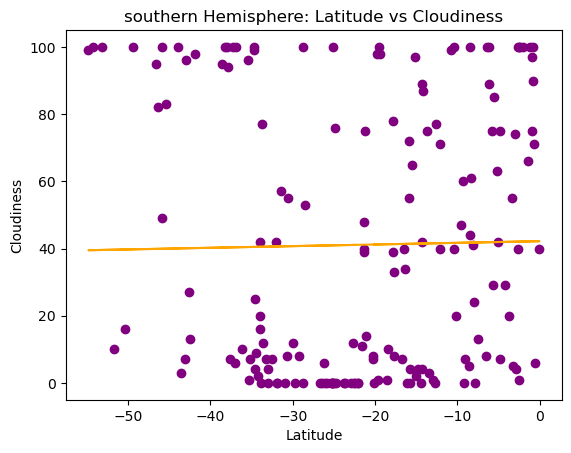

In [57]:
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],color='purple')
plt.plot(southern_hemi_df["Lat"], regress_values, color='orange')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("southern Hemisphere: Latitude vs Cloudiness")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.0


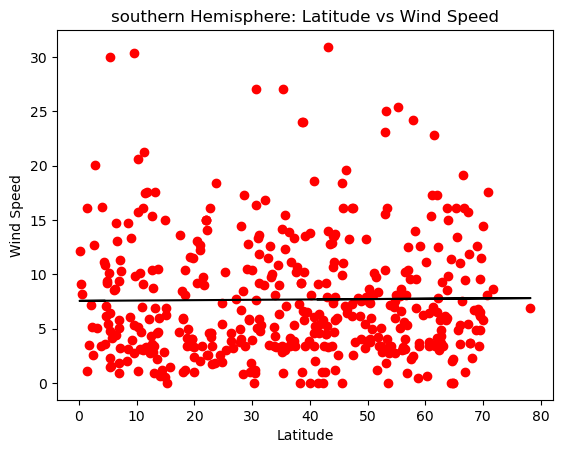

In [65]:
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],color='red')
plt.plot(northern_hemi_df["Lat"], regress_values, color='black')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("southern Hemisphere: Latitude vs Wind Speed")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

The r-squared is: 0.013


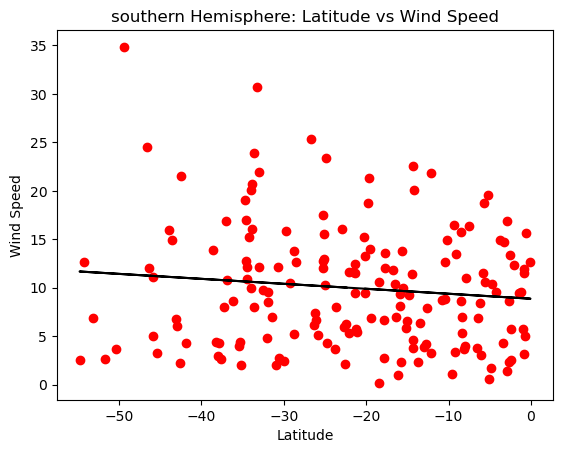

In [63]:
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],color='red')
plt.plot(southern_hemi_df["Lat"], regress_values, color='black')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("southern Hemisphere: Latitude vs Wind Speed")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()